In [1]:
import os
import gc
import tools
import torch
import Prompt
from openai import OpenAI
from definition import ModelLoader, Judge, EloRatingSystem
from peft import LoraConfig, get_peft_model, PeftModel, PeftConfig
from transformers import LlamaForCausalLM, pipeline, LlamaTokenizer, AutoTokenizer, AutoModel, AutoModelForCausalLM

In [2]:
patient=ModelLoader('/root/autodl-tmp/weights/Qwen2-7B/', '/root/LLaMA-Factory/src/saves/Qwen2-7B/lora/3st-roleSwitch/checkpoint-1715/', system_prompt='你是一个心理问题求助者，现在在向心理医生咨询')

已分配至空闲GPU：cuda:0


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

正在合并Lora结构，路径:/root/LLaMA-Factory/src/saves/Qwen2-7B/lora/3st-roleSwitch/checkpoint-1715/


In [3]:
base_path='/root/autodl-tmp/weights/'
participants = ["SoulChat2.0-Llama-3.1-8B", "llama3.1-8B-chat", "internlm2_5-7b-chat"]
elo_system = EloRatingSystem(participants, k_factor=32, initial_rating=1000)
deepseek=Judge("deepseek-chat","https://api.deepseek.com/v1","sk-d499467c635a420c93adeffbf28e6939")

In [4]:
contest_list=elo_system.generate_contest_list(rounds=40)

In [5]:
model_a, model_b = None, None
for contest in contest_list:
    name_a, name_b = contest['model_a'], contest['model_b']
    if model_a == None or model_b == None:
        model_a = ModelLoader(os.path.join(base_path, name_a))
        model_b = ModelLoader(os.path.join(base_path, name_b))
    elif name_a not in [model_a.name, model_b.name] or name_b not in [model_a.name, model_b.name]:
        del model_a
        del model_b
        gc.collect()
        torch.cuda.empty_cache()
        
        model_a = ModelLoader(os.path.join(base_path, name_a))
        model_b = ModelLoader(os.path.join(base_path, name_b))
    model_a.clear()
    model_b.clear()
    patient.clear()
    contest['dialogue_a']=tools.conduct_dialogue(patient, model_a)
    patient.clear()
    contest['dialogue_b']=tools.conduct_dialogue(patient, model_b)
    print(contest)

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


已分配至空闲GPU：cuda:1


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


已分配至空闲GPU：cuda:2


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'SoulChat2.0-Llama-3.1-8B', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我是一个19岁的女生，最近半年，我感觉自己的性格变得很奇怪，不知道怎么了？', '<心理医生>首先，感谢你信任我并分享你的感受。你提到你的性格发生了变化，这种变化是怎样的呢？可以具体描述一下吗？', '<求助者>我感觉我的性格变得很敏感，总是会因为一些小事情而情绪波动很大。有时候我会因为一些小事而感到非常沮丧，但是又不知道为什么。', '<心理医生>情绪波动和对小事的敏感反应确实会让人感到困扰。你能回忆一下，这种情绪变化是从什么时候开始的吗？', '<求助者>这种情绪变化大概是从半年前开始的，我当时正在经历一些生活上的压力，可能是因为这些压力导致了我情绪的波动。', '<心理医生>生活压力确实可能影响我们的情绪。你提到了压力，能分享一下是哪些压力让你感到困扰吗？', '<求助者>最近我一直在准备高考，压力很大，而且我还有一些家庭问题，这些都让我感到非常焦虑和困扰。', '<心理医生>你正在面对高考和家庭问题，这些都是非常有挑战性的情况。面对这些压力时，你通常是如何应对的呢？', '<求助者>我通常会尽量保持冷静，努力应对这些压力。但是最近我发现我很难保持冷静，情绪很容易被外界影响。', '<心理医生>你努力保持冷静，这是非常积极的应对方式。现在你发现自己更容易受到外界影响，这可能是压力导致的。你提到你变得很敏感，能否举个例子说明呢？', '<求助者>比如，有时候我会因为别人的一句话就感到非常沮丧，甚至会哭出来。我之前从来没有这样过，这让我觉得很困惑。', '<心理医生>听起来，你的情绪反应变得更加强烈了。这种改变让你感到困惑和不自在。在你情绪波动的时候，你通常是如何安慰自己的呢？', '<求助者>我通常会告诉自己这只是暂时的，我会努力调整自己的情绪。但是有时候我觉得这些安慰并不能真正帮助我，我需要更深入的解决方法。', '<心理医生>你已经在努力寻找解决方法，这很好。我们一起来探讨一下，你认为是什么可能导致了你情绪变化的这种模式？', '<求助者>可能是我面对压力时没有足够的应对策略，导致情绪变得不稳定。我希望能够找到一些更有效的方法来应对压力和情绪波动。', '<心理医生>你已经意识

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'llama3.1-8B-chat', 'model_b': 'SoulChat2.0-Llama-3.1-8B', 'dialogue_a': ['<求助者>我今年18岁，是个女生，最近一年来，我感觉自己的情绪很不稳定，经常会无缘无故地哭。', '<心理医生>听起来你经历了一段情绪上的波动，这肯定很不容易。能告诉我，这种情绪波动通常在什么情况下发生吗？', '<求助者>通常是在我遇到一些事情的时候，比如考试成绩不好或者和朋友吵架。这些事情会让我感到很沮丧，然后我就开始哭泣。', '<心理医生>看来这些事件触发了你的情绪反应。你提到考试成绩和朋友的矛盾，这些都是日常生活中很常见的压力源。你能描述一下，当你哭泣的时候，心里是什么感受吗？', '<求助者>当我哭泣的时候，我会感到很无助和伤心。我觉得自己无法控制自己的情绪，而且感到很沮丧。', '<心理医生>感到无助和伤心是很强烈的情感体验。哭泣其实是释放情绪的一种方式，但我想知道，你是否还尝试过其他的方式来处理这些感受？', '<求助者>我试过和家人朋友分享，但他们似乎无法理解我，我感到很失望。有时候我会选择独自待着，但还是无法摆脱这种情绪。我真的不知道该怎么办了。', '<心理医生>我理解你感到失望和困惑。有时候我们需要的支持并没有如愿以偿。独处可以给你一些空间来理清思绪，但看起来这并没有让你感觉更好。我们可以一起探索一些新的应对策略，你愿意尝试吗？', '<求助者>当然愿意尝试。我希望能够找到一种更好的方式来处理这些情绪。', '<心理医生>很好，我们可以一步步来。首先，当你感到情绪波动时，试着记录下来发生了什么，你是如何反应的，以及当时的感受。这可以帮助我们更好地理解情绪的触发点。', '<求助者>好的，我会试试记录下来。但我还是有点担心，如果我记录下来，别人会不会觉得我有问题？我怕他们不理解我。\n', '<心理医生>这是一个很正常的担忧。请记住，这个过程是为了帮助你，记录下来的是为了你自己的参考，不需要分享给任何人。除非你自己选择分享，否则这些内容是私密的。', '<求助者>谢谢你的理解和支持。我明白了，我会努力记录下来，看看能否找到一些模式。', '<心理医生>非常棒，你的开放和愿意尝试新事物的态度是非常积极的第一步。除了记录，我们还可以尝试一些放松的练习，比如深呼吸或冥想，这些可以

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'llama3.1-8B-chat', 'model_b': 'SoulChat2.0-Llama-3.1-8B', 'dialogue_a': ['<求助者>我是一个26岁的女性，我总是感到很自卑，觉得别人会看不起我。', '<心理医生>你好，很高兴你能来这里分享你的感受。能告诉我，是什么让你觉得别人会看不起你吗？', '<求助者>我觉得我长得不好看，而且性格也比较内向。我总是担心别人会嘲笑我。', '<心理医生>听起来你对自己有些严厉的评价。内向并不是坏事，它意味着你可能是一个深思熟虑的人。你能分享一下，当你感到别人可能在评价你时，你会有什么具体的反应吗？', '<求助者>我会感到很紧张，心跳加速，甚至会出汗。我害怕别人会注意到我的紧张。', '<心理医生>这些都是很常见的焦虑反应。感受到紧张是正常的，但我们可以一起找到方法来管理它。你能回想一下，这种紧张感是在什么情况下最容易出现吗？', '<求助者>我觉得在社交场合或者面对陌生人时，我最容易感到紧张。', '<心理医生>社交场合和陌生人可能会让许多人感到不适。你提到你很内向，这是否意味着你更喜欢安静和熟悉的环境？', '<求助者>是的，我更喜欢和熟悉的人在一起，而不是陌生人。我害怕在不熟悉的环境中表现不好。', '<心理医生>你的感受是完全可以理解的。每个人都有自己的舒适区。你觉得自己在熟悉的环境中表现得如何呢？', '<求助者>在熟悉的环境中，我会感到更自信，更容易表达自己。但我还是担心别人会嘲笑我。', '<心理医生>你在熟悉的环境中感到自信是很好的。关于别人嘲笑你的担忧，我们可以一步步来处理。试着想一想，是否有哪些特定的情况或人让你感到特别担心？', '<求助者>我觉得在学校和工作环境中，我更容易感到担心。我担心别人会对我做出负面评价。', '<心理医生>学校和工作环境确实有可能让人感到压力。你能否回想一下，有没有什么特定的事件或经历让你感觉到别人对你有负面评价？', '<求助者>我记得有一次在会议上，我发言时感到紧张，结果发言出了一些错误。从那以后，我开始担心别人会嘲笑我。', '<心理医生>那次经历可能给你带来了很大的压力。我们都会犯错误，这是人之常情。你觉得那次经历是否真的影响了别人对你的看法？'], 'dialogue_b': ['<求助者>我是一个25岁的女生，最近发现

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'llama3.1-8B-chat', 'model_b': 'SoulChat2.0-Llama-3.1-8B', 'dialogue_a': ['<求助者>我是一个18岁的女生，我总是对自己要求很高，但是总是做不到。我该怎么办呢？', '<心理医生>首先，我想说您已经迈出了非常重要的一步，意识到了自己对完美的追求可能给您带来了压力。能具体分享一下您通常是如何设定和追求目标的吗？', '<求助者>我通常会设定一个目标，然后制定一个计划来实现它。但是，一旦我开始执行计划，我就会对自己产生更高的要求，然后感到无法达到。', '<心理医生>听起来您是一个非常有组织和计划性的人。您能给我一个例子，说明您是如何设定目标和计划，然后又是如何对自己要求过高，最终感到挫败的吗？', '<求助者>比如，我设定的目标是每天锻炼45分钟，但是当我开始锻炼时，我就会要求自己做到完美，比如姿势、呼吸和动作都要正确。一旦我发现自己没有做到完美，我就会感到沮丧和挫败。', '<心理医生>我理解您追求完美的心情，同时也感受到您所承受的压力。这种完美主义的态度在很多时候会让我们对自己产生很高的要求。您是否尝试过调整目标，使其更加现实和可达到？', '<求助者>我从来没有尝试过调整目标，因为我总是觉得如果达不到完美的标准，就不是真正的成功。我应该如何改变这种想法呢？', '<心理医生>您认为的“完美”，是不是意味着没有任何瑕疵或缺点？如果我们将“完美”理解为一种理想化的状态，而不是一个必须达到的目标，您觉得这会对您有所帮助吗？', '<求助者>我从来没有想过将“完美”理解为一种理想化的状态。可能我一直把完美当做一个必须达到的目标。如果我能够接受一些瑕疵和缺点，也许我能够减轻一些压力。', '<心理医生>这是一个非常好的开始。我们所有人都有瑕疵和缺点，接受这一点是我们成长的一部分。您能想到一些方法来帮助自己接受不完美，同时仍然保持积极向上的态度吗？', '<求助者>我可以尝试在设定目标时给自己留一些余地，不再追求完美。我可以告诉自己，只要我尽力去做，就算没有达到完美也没有关系。这样做对我来说可能是一个挑战，但我愿意尝试。', '<心理医生>这听起来是一个非常有益的策略。尝试新事物总是需要勇气和实践。您是否愿意和我分享您的进展，并在这个过程中探索如何更好地处理这种挑战？', '<

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'llama3.1-8B-chat', 'model_b': 'SoulChat2.0-Llama-3.1-8B', 'dialogue_a': ['<求助者>我今年22岁，最近一直感到很自卑，觉得自己很无用，不知道该怎么办。', '<心理医生>你好，感谢你信任我，愿意分享你的感受。我听到你说你感到自卑，这肯定很不容易。能告诉我，是什么事情让你开始有这种感觉的吗？', '<求助者>我觉得自己在学习和工作中都表现得很差，没有取得好的成绩，也没有得到别人的认可。这让我觉得自己很无用，没有价值。', '<心理医生>看来你对自己的评价很严苛，这种感觉肯定很沉重。我们都有时会对自己有所期待，但当我们没有达到这些期待时，就可能会感到失望和自我否定。除了学习和工作，还有其他方面让你感到自卑吗？', '<求助者>我觉得我在社交方面也很差，总是觉得自己不受欢迎，无法交到朋友。这让我更加自卑，觉得自己一无是处。', '<心理医生>社交确实是一个复杂的领域，很多人都会有这样的担忧。请记住，社交技能可以学习和提高。关于你说的“一无是处”，我想知道，你有没有发现自己的一些优点或者曾经做过一些让自己感到骄傲的事情？', '<求助者>我曾经获得过一个学校的奖学金，也参加过一些活动并获得了一些奖项。但这些成就好像无法弥补我现在的自卑感。我总觉得这些都不够，我还是觉得自己很差。', '<心理医生>你获得的这些奖项和成就是非常了不起的，这说明你有能力和潜力。有时，我们的自我价值感会被当前的情绪所掩盖。你觉得这些成就被忽视了，是因为什么原因呢？', '<求助者>可能是我太过于关注自己的不足，而忽略了自己的优点和成就。我总是觉得自己需要更加努力，才能得到别人的认可和称赞。', '<心理医生>你的自我意识很强，这是好事，但有时我们确实需要平衡一下，认识到我们已经做得很好了。你提到你觉得需要别人的认可，这是很自然的需求。但我们也知道，别人的评价并不是我们价值的全部。你对此有什么想法吗？', '<求助者>我明白别人的评价并不是我价值的全部，但我还是希望能够被别人认可和喜欢。我觉得只有得到别人的认可，我才能感到自信和有价值。', '<心理医生>希望被认可和喜欢是人之常情，这让我们感到被接纳和有价值。然而，当这种希望变成我们价值的全部时，就可能会让我们感到脆弱。我们可以一起探索一些方法，让你

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'SoulChat2.0-Llama-3.1-8B', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我是一个15岁的女生，最近半年一直觉得自己有抑郁症，但是家人和朋友都不太理解我，我该怎么办？', '<心理医生>首先，我想说你已经迈出了非常重要的一步——寻求帮助和表达自己的感受。我在这里愿意聆听你的故事，并与你一起探索可能的解决之道。你能告诉我，你的抑郁感主要表现在哪些方面吗？', '<求助者>我的抑郁感主要表现在情绪低落、失眠、食欲减退、社交退缩等方面。我感觉自己和别人交流困难，也很难集中注意力，对很多事情都提不起兴趣。', '<心理医生>你提到的这些症状确实可能是抑郁症的表现。对于你所经历的失眠和食欲减退，你尝试过哪些方法来缓解呢？', '<求助者>我试过一些方法，比如调整作息时间、尝试放松技巧和饮食调整，但效果都不明显。我开始怀疑自己的抑郁症是否真的存在，因为这些方法对我都没有作用。', '<心理医生>我理解你的困惑和挫败感。抑郁症的治疗确实需要时间，而且每个人的反应都是独特的。我们不能单纯地根据初始的尝试来判断情况。对于你来说，抑郁症的影响似乎很强烈，这个时候可能需要更具体和专业的帮助。你考虑过寻求心理专业人士的辅导吗？', '<求助者>我其实没有考虑过寻求心理专业人士的辅导，因为我对抑郁症的了解非常有限。我担心他们会认为我是一个矫情的人，或者觉得我缺乏勇气面对自己的问题。我害怕被别人嘲笑或被拒绝。', '<心理医生>你的担忧是可以理解的。很多人在寻求心理帮助时都会有类似的顾虑。但请相信，专业的心理治疗师在那里是为了帮助你，他们会以专业和理解的态度对待你的困扰。事实上，寻求帮助是一种勇气的表现，而你已经做得很好了。', '<求助者>谢谢你的鼓励和理解。我现在确实感到有些勇气来面对这个问题了。但我还是有些担心，因为我担心家人和朋友会不理解我，或者认为我是在找借口逃避现实。我该如何应对他们的质疑呢？', '<心理医生>这是个很好的问题。面对家人和朋友的质疑，你可能需要一些策略。首先，试着与他们进行开放而诚实的沟通，告诉他们你正在经历什么，你的感受以及你为何需要帮助。同时，强调寻求帮助是为了你和他们更好的未来。有时候，提供一些关于抑郁症的信息和资料也许可以帮助他们更好地理解你的处境

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'SoulChat2.0-Llama-3.1-8B', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我今年26岁，因为性取向问题，感到很痛苦，不知道该怎么办。', '<心理医生>你好，很高兴你能来这里寻求帮助。关于你的困扰，我们可以一起探讨，看看有什么可能的解决办法。你能告诉我，这种感觉是怎样开始的吗？', '<求助者>大概是从上大学开始，我发现我对男生有好感，但一直以为这只是青春期的幻想。直到最近，我才发现自己对男性有真正的感情。但是我还是喜欢女性，这让我感到困惑和痛苦。', '<心理医生>我能理解你现在的心情，性取向的问题确实会带来很多的迷茫和痛苦。你对这种感受有多久了？你提到你对男性有真正的感情，这是在什么情况下发生的呢？', '<求助者>这种感受大概已经持续了两年左右了。最近的一个晚上，我突然意识到我对男性有真正的感情，这让我感到非常震惊和困惑。我之前一直以为这只是青春期的幻想，但现实告诉我并不是这样。我真的不知道该怎么办才好。', '<心理医生>我能感受到你的困惑和不安。面对这样的情感体验，任何人都可能会感到不知所措。告诉我，这种发现对你的日常生活有什么影响？', '<求助者>这种发现让我感到非常痛苦和困惑。我害怕面对自己的真实感受，也担心别人会对我产生误解或歧视。我感到非常孤独和无助，不知道该如何处理这种情况。我真的不知道该怎么办才好。', '<心理医生>我理解你的担忧。面对内心的真实感受，感到孤独和无助是很常见的。我们可以一起探索这些感受，看看是否能找到一些缓解的方法。你曾尝试过跟朋友或家人谈论你的感受吗？', '<求助者>我曾经跟一些朋友聊过，他们对我的感受表示理解和关心。但是，我还是感到很困惑和痛苦。我不知道该如何面对自己的性取向，也不知道该如何与他人相处。我真的不知道该怎么办才好。', '<心理医生>能够与朋友分享你的感受是很好的开始。他们的理解和支持对你来说是宝贵的资源。关于你现在的困惑，我们可以一步步来解决。首先，让我们来看看你对自己的感受。你能描述一下，当你想到自己的性取向时，内心有什么样的想法和感受吗？', '<求助者>当我想到自己的性取向时，内心充满了困惑和痛苦。我感到自己无法接受自己的真实感受，同时又害怕面对别人的误解和歧视。我不知道该如何处理这些感受

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'llama3.1-8B-chat', 'model_b': 'SoulChat2.0-Llama-3.1-8B', 'dialogue_a': ['<求助者>我是一个23岁女生，最近一年情绪波动很大，我应该怎么办？', '<心理医生>首先，我想说您已经迈出了很重要的一步，来这里寻求帮助。您能分享一下，是什么让您开始注意到自己的情绪波动吗？', '<求助者>去年的时候，我开始发现自己情绪起伏很大，有时候感觉很开心，有时候又突然变得很沮丧。我觉得自己无法控制这种情绪波动，这让我很困扰。', '<心理医生>情绪波动是很多人都会经历的事情，特别是在我们面临生活中的压力和挑战时。您提到您感到困扰，这种感觉是每天都有吗？', '<求助者>是的，这种感觉几乎每天都有。我感到很困惑，不知道该如何应对这种情绪波动。', '<心理医生>我能理解您现在的困惑。您是否尝试过一些方法来管理您的这些情绪波动呢？', '<求助者>我试过一些方法，比如运动和冥想，但效果并不明显。我感觉这些方法并不能真正帮助我解决情绪波动的问题。', '<心理医生>您已经尝试了一些方法，这是积极的探索。您觉得这些方法在使用过程中有什么困难吗？', '<求助者>我觉得在使用这些方法时，我很难坚持下去。我总是容易放弃，然后情绪又会变得很糟糕。我真的希望能够找到一种更有效的方法来管理我的情绪。', '<心理医生>坚持下去确实需要很大的意志力，尤其是在情绪不稳定的时候。您提到希望找到更有效的方法，我们可以一起探讨一些可能的策略。', '<求助者>好的，我很愿意尝试。您有什么建议吗？', '<心理医生>我们可以从简单的事情开始。比如说，您能否描述一下，通常是什么触发了您情绪的变化？', '<求助者>通常当我面临压力或挑战时，我就会感到情绪波动。比如，当面对工作上的压力时，我会感到很沮丧，但又无法控制自己的情绪。', '<心理医生>明白了，压力和挑战确实会影响我们的情绪。在面对这些情况时，有没有一些特定的想法或信念出现在您的脑海中？', '<求助者>有时候我会想，为什么我会这么沮丧，为什么我不能控制自己的情绪。这种想法让我更加沮丧，觉得自己很无助。', '<心理医生>我理解这种感觉，自我批评的想法确实可以加剧我们的沮丧。您是否尝试过用更加温和和支持性的语言来对待自己呢？'], 'dialogue_b'

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'SoulChat2.0-Llama-3.1-8B', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我是一个18岁的女生，最近发现自己有自杀倾向，我该怎么办？', '<心理医生>首先，我想告诉您，您的安全是最重要的。如果您现在处于危险之中，请立即联系紧急服务或求助热线。我们可以一起探索一些可以帮助您的资源和方法。', '<求助者>谢谢您的支持。我现在感觉非常绝望和无助，不知道该怎么办。我曾经尝试过自杀，但最终放弃了。我现在只想离开这个世界。', '<心理医生>我理解您现在的感受是多么的沉重和痛苦。您勇敢地与我分享了您的经历，这是向着康复迈出的第一步。您愿意告诉我，是什么让您觉得如此绝望吗？', '<求助者>我感到自己无法控制自己的情绪，而且经常陷入消极和自责的循环中。我感觉自己无法应对现实，对未来也没有希望。我害怕孤独和被拒绝。', '<心理医生>您提到了很多重压，感觉自己无法控制情绪，这肯定非常困难。您能告诉我，这些感受是何时开始的吗？', '<求助者>这些感受大概从半年前开始的。我感到非常疲惫和沮丧，对生活失去了兴趣。我无法集中注意力，也经常失眠。', '<心理医生>这段时间里您承受了很多，感到疲惫和沮丧是可以理解的。您提到集中注意力和睡眠问题，这可能是压力和情绪困扰的一个迹象。您是否尝试过寻求帮助或治疗？', '<求助者>我曾经尝试过和家人朋友交流，但感觉他们并不理解我。我也没有找到适合我的治疗方式。我真的不知道该怎么办了。', '<心理医生>与他人沟通时感到被误解是非常痛苦的，而找到合适的帮助也是一段艰难的旅程。我在这里愿意听您讲述，了解您的经历。您是否愿意和我一起探索可能的解决方案？', '<求助者>我愿意尝试，但我真的很害怕失败。我不知道是否能找到一个适合我的方法。我真的感到很无助。', '<心理医生>恐惧和不确定感是正常的，尤其是在您已经尝试过许多方法却没有找到答案的时候。我们可以一步一步来，探索不同的途径，并且我会在这个过程中支持您。您觉得我们从哪里开始会比较好？', '<求助者>我觉得我可以从改变我的思维方式开始。我经常陷入消极的循环中，无法摆脱。我希望能够学会更积极地看待事物。', '<心理医生>这是一个很好的起点。改变思维方式需要时间和练习，但这是一个重要的步骤

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'SoulChat2.0-Llama-3.1-8B', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我是一个24岁的女生，最近一年来，我总是习惯性地发脾气，我该怎么办？', '<心理医生>首先，感谢您信任我并分享您的困扰。我能感受到您最近可能遇到了一些挑战。您能告诉我，通常什么情况会触发您的脾气吗？', '<求助者>我最近的工作压力很大，而且我总是感到很沮丧。我开始怀疑自己是否能够胜任这份工作。这导致我情绪低落，无法集中注意力。', '<心理医生>工作压力和自我怀疑确实可以造成很大的情绪压力。您提到您无法集中注意力，这是否也影响了您的日常生活？', '<求助者>是的，我发现自己无法集中注意力，导致我在工作和学习上都遇到了困难。我感到非常沮丧和无助。', '<心理医生>面对这些挑战时感到沮丧和无助是很自然的反应。您提到您在学习上也遇到了困难，能否分享更多关于这一方面的感受？', '<求助者>是的，我在学习方面也遇到了困难。我发现自己无法集中精力，很难理解课程内容，这让我感到很沮丧。我担心自己无法达到预期的学习目标。', '<心理医生>这种担忧是可以理解的，尤其当您有明确的目标却感到达不到时。您有尝试过什么方法来帮助自己集中注意力或改善学习效率吗？', '<求助者>我试过一些方法，比如调整学习环境和时间安排，但效果并不明显。我开始怀疑自己是否真的适合学习和工作。这让我感到很沮丧。', '<心理医生>尝试不同的方法并评估效果是一个很好的开始。请记住，每个人都有适应过程。您提到的怀疑，是否也影响了您对自己的看法？', '<求助者>是的，我开始怀疑自己的能力和价值，这让我感到很沮丧和无助。我害怕被他人嘲笑或批评。我真的不知道该怎么办。', '<心理医生>面对这些内心的怀疑和恐惧确实很困难。您提到的恐惧，是否有具体的事件或情况触发？', '<求助者>我最近经历了一些工作上的挫折，这让我更加怀疑自己的能力。同时，我也担心自己无法应对工作和学习上的压力。这些都让我感到害怕和无助。我真的不知道该怎么办。', '<心理医生>工作上的挫折可以很打击人的自信心。您提到的这些担忧和恐惧，都是在面对挑战时非常普遍的感受。您是否愿意探索一些可以帮助您应对这些感受的策略？', '<求助者>是的，我愿意尝试一些策略来

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'SoulChat2.0-Llama-3.1-8B', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我是一个16岁的女生，最近我感觉自己很孤独，每天都感到很痛苦。我该怎么办呢？', '<心理医生>首先，我想说您能来这里并且愿意分享您的感受，这本身就是一个勇敢的步骤。感到孤独和痛苦是很多人都会经历的感觉，特别是在青春期。您能告诉我，是什么让您感到这么孤独吗？', '<求助者>我觉得我与同学和朋友之间都没有共同话题，他们总是谈论一些我不感兴趣的事情。我感觉他们对我没有真正的关心，只是表面的社交。', '<心理医生>您感到朋友们之间缺少了真诚的交流和深层次的联系，这让您觉得自己被边缘化了。这种感觉一定很难受吧？', '<求助者>是的，我感觉很无助，不知道该怎么做才能改变这种状况。', '<心理医生>我理解您的无助感。改变现状的想法让人感到既紧张又兴奋。您是否曾经尝试过接近他们，或许参与他们的活动，看看是否能找到共同点？', '<求助者>我曾经试过，但感觉自己总是无法融入他们的圈子，他们对我总是很冷漠。我真的不知道该怎么办了。', '<心理医生>当您尝试接近他们时遇到了冷漠的反应，这肯定让您感到受挫。您觉得是什么阻碍了您与他们之间的交流呢？', '<求助者>我觉得可能是我对他们不够了解，或者他们对我有所误解。我也不知道如何改善这种情况。', '<心理医生>了解彼此确实需要时间和努力。您是否愿意探索一些新的方式来与他们交流，或者尝试找到一些共同的兴趣来建立联系呢？', '<求助者>我愿意尝试，但我不知道从何开始。您有什么建议吗？', '<心理医生>您可以尝试从共同的经历或兴趣开始，比如学校的某个项目或活动。也许可以在课堂上或课后活动中与他们建立起对话。您觉得学校里有哪些活动是您可能感兴趣的？', '<求助者>我觉得学校的运动队和音乐俱乐部可能适合我，但我对这些活动的了解还不够。您能告诉我一些关于这些俱乐部的信息吗？', '<心理医生>当然可以。运动队通常会有不同的项目，比如篮球、足球或田径，而音乐俱乐部则会进行不同的音乐活动，比如练习或表演。您对这些感兴趣吗？', '<求助者>我对音乐俱乐部比较感兴趣，因为我喜欢唱歌和演奏乐器。但我担心自己不够好，怕被拒绝。', '<心理医生>您对音乐有热情，

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'SoulChat2.0-Llama-3.1-8B', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我感觉最近心情很抑郁，不知道该怎么办。', '<心理医生>你好，感谢你信任我，愿意分享你的感受。能告诉我，是什么事情让你感到抑郁吗？', '<求助者>我最近工作压力很大，经常加班，而且感觉自己没有进步。', '<心理医生>工作的压力确实可以让人感到沉重。你说的没有进步，是指在职业发展上，还是工作内容上感到重复？', '<求助者>我觉得在职业发展上没有进步，一直重复做同样的工作，没有新的挑战。', '<心理医生>理解你的感受，重复的工作确实会让人感觉到乏味。除了工作之外，有没有其他事情也让你感到压力？', '<求助者>除了工作，我最近和家人的关系也有些紧张，经常吵架。感觉很烦。', '<心理医生>家庭的争执确实会影响情绪。你能分享一下，通常是什么原因导致你们的争吵吗？', '<求助者>主要是因为家人的期望和我的期望不一致，经常产生分歧。', '<心理医生>期望不一致确实会导致摩擦。你觉得这种分歧主要体现在哪些方面？', '<求助者>主要是在家庭责任和经济问题上，我们有不同的看法。我希望能多做些家务，但是家人认为我已经很辛苦了。经济问题上，我们也有不同的意见。', '<心理医生>看来你希望在家庭角色上有更大的参与度，而在经济问题上，你可能感到有些不被理解。这种情感上的需要没有得到满足，会让人感到挫败。', '<求助者>是的，我就是觉得自己的需求没有得到满足，感到很挫败。', '<心理医生>挫败感是很正常的反应。你有没有尝试过和家人沟通你的这些感受和需求？', '<求助者>我试过和家人沟通，但是他们似乎不太理解我，觉得我太敏感了。我感到很沮丧。', '<心理医生>当我们的感受没有被理解时，确实会感到沮丧。你提到自己敏感，这是否意味着你对情感有着较高的敏感度？'], 'dialogue_b': ['<求助者>我是一个20岁的女生，最近发现自己对同性产生了性吸引力，我该怎么办？', '<心理医生>你好！我很高兴你来找我谈谈这个话题。首先，重要的是你知道你在和一个非判断性的、支持性的耳朵说话。你的性取向是你的生理和心理特征的一部分，绝不是什么可耻或需要改变的事。\n\n如果你对同性产生了性吸引力，

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'llama3.1-8B-chat', 'model_b': 'SoulChat2.0-Llama-3.1-8B', 'dialogue_a': ['<求助者>我是一个19岁的女生，最近发现自己有焦虑症和强迫症。我想知道如何快速缓解焦虑和强迫症？', '<心理医生>首先，我想说你已经迈出了非常重要的一步，意识到自己的症状并寻求帮助。焦虑和强迫症都是可以通过适当的方法来缓解的。我们可以一起探讨一些可能对你有帮助的策略。', '<求助者>谢谢你的鼓励。我真的很希望能够摆脱这些症状，重新获得内心的平静和自信。你有什么建议吗？', '<心理医生>当然，我们可以尝试一些放松技巧来缓解焦虑。比如深呼吸练习，它可以帮助你的身体和心灵放松。你愿意尝试一下吗？', '<求助者>好的，我会尝试一下深呼吸练习。还有其他的放松技巧吗？', '<心理医生>除了深呼吸，我们还可以尝试肌肉放松练习和渐进性肌肉放松法。这些技巧可以帮助你意识到身体的紧张状态，并通过放松肌肉来缓解焦虑。', '<求助者>听起来不错，我会尝试肌肉放松练习和渐进性肌肉放松法。还有其他的方法吗？', '<心理医生>我们还可以通过心理治疗来帮助你。例如，认知行为疗法可以帮助你识别和改变可能导致焦虑和强迫的思维模式。', '<求助者>听起来很有帮助，我会考虑接受心理治疗。除了这些方法，还有其他建议吗？\n', '<心理医生>保持健康的生活方式也很重要。确保你有足够的睡眠，保持良好的饮食习惯，并定期进行身体活动。', '<求助者>我明白了，我会注意保持健康的生活方式。还有其他建议吗？', '<心理医生>你可以尝试写日记，记录你的感受和思维模式。这有助于你更清晰地了解自己的内心世界，并帮助你发现可能导致焦虑的思维模式。', '<求助者>写日记听起来是个好主意。我会尝试记录我的感受和思维模式。还有其他建议吗？', '<心理医生>练习正念也是非常有益的。它可以帮助你专注于当前的体验，并减少对过去或未来的过多担忧。', '<求助者>我会尝试练习正念，专注于当前的体验。还有其他建议吗？', '<心理医生>在面对强迫思维时，尝试挑战它们的真实性是一个有效的策略。你可以问自己这些想法是否基于事实，是否有证据支持它们。'], 'dialogue_b': ['<求助者>我是一个20岁的女生，最近和男朋友在一起总是吵架，我感

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'SoulChat2.0-Llama-3.1-8B', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我是一个19岁的女生，最近感到非常焦虑，我该怎么办？', '<心理医生>你好，我很高兴你能来这里寻求帮助。能和我分享一下，是什么让你感到焦虑吗？', '<求助者>我觉得自己无法适应大学生活，总是感到很沮丧和焦虑。', '<心理医生>听起来你正在经历一些挑战。能告诉我更多关于你在大学遇到的困难吗？', '<求助者>我觉得自己无法适应新的环境，很难交到朋友。而且，我总是感到很紧张，不知道该如何处理。', '<心理医生>在一个全新的环境中感到紧张是非常正常的。关于交朋友的部分，你能说说你通常是如何尝试的吗？', '<求助者>我通常会主动和别人打招呼，但总是担心自己会说错话或者被拒绝。我真的很害怕被孤立。', '<心理医生>你愿意主动打招呼，这很好。被拒绝的担忧可能让你感到害怕。这种感觉在任何人身上都可能发生，你并不孤单。', '<求助者>我知道，但我还是很难克服这种恐惧。我不知道该如何处理这种情况。我真的需要帮助。', '<心理医生>你已经迈出了寻求帮助的重要一步。我们可以一起探索一些策略，帮助你减轻这种恐惧感。', '<求助者>我愿意尝试。你能给我一些关于如何处理这种情况的具体建议吗？', '<心理医生>当然可以。首先，我们可以尝试一些放松技巧，比如深呼吸，来帮助你在感到紧张时放松身心。', '<求助者>好的，我会尝试一下。还有其他的方法吗？', '<心理医生>另外，我们可以尝试一些认知重构的方法，帮助你改变对被拒绝的看法。例如，我们可以一起探讨一些更积极的想法，来替代那些令你感到不安的念头。', '<求助者>听起来很有帮助。我会尝试这些方法。但我还是感到很害怕被孤立。我该如何克服这种感觉呢？', '<心理医生>感到害怕被孤立是很自然的，但请记住，每个人都有可能经历这种感觉。我们可以一起工作，帮助你建立起信心，并且找到与他人建立联系的方法。'], 'dialogue_b': ['<求助者>我是一个20岁的女生，最近遇到了一个问题，我很困惑，不知道该如何处理。', '<心理医生>我很高兴你来找我了。作为一个心理治疗师，我会尽我所能帮助你解决困扰你的问题。请告诉我，你想谈论什么问题？是什么让你

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'SoulChat2.0-Llama-3.1-8B', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我今年30岁，已经结婚了。我和老婆结婚之前，她对我说她有性冷淡的问题。我非常担心，怕不能满足她的需要。', '<心理医生>首先，感谢你信任我，愿意分享你的担忧。性冷淡确实是一个需要认真对待的问题。能告诉我，你们结婚前是如何了解这个问题的吗？', '<求助者>我们是在婚后才开始了解到这个问题的。她告诉我她之前有过性冷淡的经历，但具体细节我没有问过。', '<心理医生>我理解这可能对你来说是一个敏感的话题。你能分享一下，这个问题对你产生了哪些具体的影响吗？', '<求助者>这个问题让我感到非常焦虑和困惑。我担心我无法满足她的需求，导致我们的婚姻出现问题。我真的不想失去她。', '<心理医生>你的担心是可以理解的。感觉无法满足伴侣的需求确实会给人带来压力。你提到了焦虑和困惑，这些情绪对你的日常生活有影响吗？', '<求助者>是的，这些问题让我感到非常焦虑和困惑。我经常担心自己的能力，也担心她会对我失望。这导致我经常失眠，没有食欲，甚至有自杀的念头。我真的需要帮助。', '<心理医生>我很抱歉听到你正在经历这些困难。面对这样的情绪，需要很大的勇气来寻求帮助。我们可以一起探讨一些可能帮助你缓解这些情绪的方法。你愿意尝试吗？', '<求助者>是的，我愿意尝试。我希望能够找到一种解决方法，重新恢复我的生活和婚姻。', '<心理医生>很好。我们可以先从你目前的生活习惯开始，看看是否有什么可以改善的。比如，你的作息时间、饮食习惯或者是你的兴趣爱好。你能描述一下你的一天吗？', '<求助者>我每天早上六点起床，然后上班。下班后，我通常会回家做晚饭，然后和老婆一起吃饭。晚上我会看一些电视剧，然后睡觉。我基本上没有其他爱好。', '<心理医生>听起来你的日常生活比较规律，这是好事。不过，你提到晚上会看电视剧，这可能会影响你的睡眠质量。有没有可能尝试一些放松的活动，比如阅读或冥想，来帮助你放松心情，改善睡眠呢？', '<求助者>好的，我会尝试一些放松的活动，比如阅读或冥想。希望这能帮助我改善睡眠质量。', '<心理医生>很好，改变生活习惯需要时间，但每一步小小的改进都是向前迈进的一大步。关于你的焦虑，我们可以尝

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


已分配至空闲GPU：cuda:2


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'internlm2_5-7b-chat', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我是一个30岁的女性，最近和男友分手了，但是心里还是放不下他，不知道该怎么办。', '<心理医生>面对分手后的情感困扰是很正常的，每个人处理情感的方式都不同。以下是一些建议，希望能帮助你度过这个难关：\n\n1. **接受情绪**：首先，接受自己的感受是很重要的。悲伤、愤怒、困惑都是正常的情绪反应。给自己时间去感受这些情绪，而不是压抑它们。\n\n2. **沟通与理解**：如果可能的话，尝试与前任进行开放而诚恳的对话。了解分手的原因，并表达自己的感受和需求。这有助于双方理解彼此，也可能会发现可以解决的问题。\n\n3. **建立支持系统**：和朋友、家人谈谈你的感受。他们可以提供情感支持，帮助你从不同的角度看待问题，或者给你一些实际的建议。\n\n4. **专注于自我提升**：分手是一个自我反思的好机会。利用这段时间专注于个人成长，比如学习新技能、培养兴趣爱好、锻炼身体等。这不仅能让你转移注意力，还能增强自信心。\n\n5. **设定界限**：如果你们之间仍然有联系，确保你设定了健康的界限。保护自己的情感和心理健康是非常重要的。\n\n6. **专业帮助**：如果你发现自己难以独自应对这些情绪，寻求专业的心理治疗师或咨询师的帮助是一个很好的选择。他们可以提供专业的指导和支持，帮助你更好地理解和管理自己的情感。\n\n记住，每个人处理情感的方式和时间都是不同的。给自己一些耐心，相信随着时间的推移，你会逐渐找到自己的平衡点。', '<求助者>谢谢你的建议，我会尝试接受自己的情绪并寻找适合我的方法来处理这个分手的困扰。但是，我还是很担心自己的未来，害怕再次受伤。', '<心理医生>担心未来是很自然的情感反应，尤其是在经历了重要的关系变动之后。以下是一些策略，可以帮助你更好地面对未来的不确定性，减少再次受伤的可能性：\n\n1. **设定现实的目标**：为自己设定一些现实且可实现的小目标。这些目标可以是职业上的、个人成长上的或是社交活动上的。实现这些小目标可以给你带来成就感，并帮助你建立自信。\n\n2. **学会自我保护**：了解自己在关系中的需求和界限，并学会在关系中清晰地表达这些需求。这有助于建立

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'internlm2_5-7b-chat', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我是一个28岁的女生，最近我发现自己的情绪变得很不稳定，我感到很沮丧，不知道该怎么办。', '<心理医生>我很抱歉听到你正经历这样的困扰。情绪不稳定可能是由多种因素引起的，包括生活中的压力、人际关系问题、工作压力、或是健康问题。面对这种情况，你可以考虑以下几个步骤来帮助自己：\n\n1. **自我观察**：尝试记录下你的情绪变化，包括情绪出现的时间、持续时间以及触发因素。这有助于你更好地了解自己的情绪模式。\n\n2. **表达情绪**：找到一个安全的方式表达你的情绪，比如写日记、与信任的朋友或家人交谈，或者考虑专业心理咨询。\n\n3. **建立支持系统**：寻找能够提供情感支持和实际帮助的人，比如朋友、家人或支持小组。\n\n4. **健康生活方式**：确保你有足够的睡眠，均衡的饮食，以及适量的运动。这些都有助于改善你的情绪状态。\n\n5. **专业帮助**：如果你发现情绪问题严重影响了你的日常生活，建议寻求专业的心理健康服务。心理治疗师或心理咨询师可以提供个性化的支持和指导。\n\n6. **学习放松技巧**：尝试一些放松技巧，如深呼吸、冥想、瑜伽或渐进性肌肉放松，这些都有助于缓解压力和焦虑。\n\n记住，寻求帮助是勇敢的表现，而不是弱点。每个人在面对困难时都需要支持。希望这些建议对你有所帮助，如果你需要进一步的个性化建议或支持，请考虑寻求专业的心理健康服务。', '<求助者>谢谢你的建议，我会尝试记录下自己的情绪变化，并试着找到一个安全的方式表达自己的情绪。我也会考虑与朋友或家人进行沟通，看看他们是否能提供一些帮助和支持。同时，我也会注意保持健康的生活方式，尽量保证充足的睡眠和饮食均衡。如果情况没有好转，我会考虑寻求专业的心理健康服务。再次感谢你的支持和鼓励！', '<心理医生>非常欢迎你的积极态度和行动计划。记住，你并不孤单，有许多资源和支持可以帮助你度过这段困难时期。请记得，寻求帮助是迈向更健康、更幸福生活的重要一步。\n\n如果你在实施这些建议的过程中遇到任何困难，或者有任何疑问，随时都可以回来寻求帮助。祝你早日找到内心的平静和幸福！', '<求助者>非常感谢你的鼓励和理解。我会

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'llama3.1-8B-chat', 'model_b': 'internlm2_5-7b-chat', 'dialogue_a': ['<求助者>我最近总是感到很沮丧，不知道该怎么办。', '<心理医生>我很抱歉听到你最近感到沮丧。面对情绪困扰时，采取一些积极的措施是非常重要的。以下是一些建议，希望能对你有所帮助：\n\n1. **表达情感**：找到一种方式来表达你的感受，无论是通过写日记、绘画、音乐还是与信任的朋友或家人交谈。\n\n2. **保持健康的生活习惯**：确保你有足够的睡眠、均衡的饮食和定期的体育活动。良好的身体状态对心理健康有积极的影响。\n\n3. **设定小目标**：给自己设定一些可实现的短期目标，这可以帮助你保持动力和希望。\n\n4. **寻求专业帮助**：如果你觉得自己的情绪问题超出了你的控制，或者它们开始影响到你的日常生活，寻求专业的心理治疗师或医生的帮助是非常重要的。\n\n5. **探索兴趣爱好**：投身于你喜欢的活动或爱好中，这不仅能带来乐趣，还能提供一种逃避负面情绪的途径。\n\n6. **正念练习**：尝试一些正念练习，如冥想或深呼吸，这些可以帮助你放松身心，减少焦虑和压力。\n\n记住，寻求帮助是勇敢的表现，而不是弱点。面对情绪困扰时，有很多资源和支持可供利用。希望这些建议能为你提供一些帮助和安慰。如果你愿意，也可以分享更多关于你目前情况的细节，这样我可以提供更具体的建议。', '<求助者>谢谢你的建议。我确实觉得这些方法对我有帮助。我会尝试写日记，找到一种表达情感的方式。我也会注意保持健康的生活习惯，确保有足够的睡眠和均衡的饮食。同时，我也会设定一些小目标，让自己有动力去面对困难。如果情况没有好转，我会考虑寻求专业帮助的。至于探索兴趣爱好，我其实一直很喜欢画画，但最近一直没有时间去尝试。我会重新找回对画画的兴趣，并将它作为逃避负面情绪的一种途径。正念练习听起来也不错，我会尝试一下冥想和深呼吸。再次感谢你的支持和建议！', '<心理医生>很高兴听到这些计划，并且看到你对未来持积极的态度。你的行动表明你已经迈出了重要的一步，这本身就是一种积极的改变。\n\n记住，改变不会在一夜之间发生，但每一步都是朝着更健康、更幸福生活迈进的重要步骤。保持耐心，对自己有信心，你已经在做得很好了。\n\n如果你在尝试这

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'llama3.1-8B-chat', 'model_b': 'internlm2_5-7b-chat', 'dialogue_a': ['<求助者>我是一个22岁的女生，我有一个问题，就是我有强迫行为，而且最近越来越严重了。', '<心理医生>首先，我想告诉你，有强迫行为并不意味着你有什么问题，这其实是很常见的情况。强迫行为是指一个人重复执行某些动作或思维过程，尽管这些行为并不是由外界环境或内在需求所驱动的。这些行为往往被视为一种应对机制，帮助人们减轻内心的焦虑和不安。\n\n然而，当这些行为开始影响到你的日常生活、工作效率、人际关系以及心理健康时，它们就可能演变成强迫症（Obsessive-Compulsive Disorder, OCD）。强迫症是一种精神健康障碍，其特征是反复出现的强迫思维和/或强迫行为。\n\n以下是一些可能帮助你应对强迫行为的方法：\n\n1. **认知行为疗法（CBT）**：这是一种被广泛用于治疗强迫症的心理治疗方法。通过CBT，你可以学习如何识别和挑战你的强迫思维，并逐渐减少强迫行为。\n\n2. **暴露与反应预防（ERP）**：这是CBT中一种特别有效的技术，通过逐步暴露于引发强迫思维的情境中，同时避免进行强迫行为，帮助你逐渐降低对这些情境的恐惧和焦虑。\n\n3. **正念练习**：通过正念练习，你可以学会如何更加关注当下，减少对未来可能发生的事情的过度担忧。\n\n4. **保持健康的生活方式**：保持规律的作息时间、健康的饮食和适量的运动，这些都有助于改善你的整体心理健康状况。\n\n5. **寻求专业帮助**：如果你发现自己无法独立应对强迫行为，寻求专业的心理治疗师或精神科医生的帮助是非常重要的。他们可以为你提供个性化的治疗方案，帮助你更好地管理你的强迫行为。\n\n请记住，寻求帮助是勇敢的表现，而不是弱点。每个人在面对心理挑战时都需要支持。希望这些建议对你有所帮助。如果你愿意，也可以考虑预约心理咨询，进一步探讨你的情况和可能的解决方案。', '<求助者>谢谢你的回答，我会考虑尝试认知行为疗法（CBT）和正念练习来帮助我应对强迫行为。不过，我还是有些担心这些方法是否能够真正有效。你有其他的建议吗？', '<心理医生>理解你的担忧，确实，每个人对治疗方法的反应都是不同的，但许多研究表明，认知行为疗法（

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'llama3.1-8B-chat', 'model_b': 'internlm2_5-7b-chat', 'dialogue_a': ['<求助者>我是一个23岁的女生，我最近发现我总是喜欢和别人比较，而且很羡慕别人。我该怎么办呢？', '<心理医生>感到羡慕和比较他人是很自然的人类情感，但当它开始影响你的自我价值感、自尊或导致不健康的生活习惯时，它可能就需要得到关注了。以下是一些建议，希望能帮助你应对这种倾向：\n\n1. **自我意识**：首先，识别比较的触发点是什么，是为了什么目的。是工作、外貌、成就、人际关系还是其他方面？了解比较的根源可以帮助你采取更有针对性的措施。\n\n2. **重塑思维模式**：尝试将比较转化为自我提升的动力。关注个人成长和进步，而不是与他人比较。将注意力放在自己的旅程上，而不是他人的成就上。\n\n3. **培养感恩**：每天花时间思考你感激的事物，无论是友情、健康、工作还是生活中的小确幸。这能帮助你将焦点从比较转移到欣赏和珍惜自己拥有的。\n\n4. **设定个人目标**：为自己设定实际可行的短期和长期目标。关注自己的成就，而不是和他人比较。\n\n5. **寻求支持**：和朋友、家人或者心理健康专业人士谈谈你的感受。有时候，仅仅是分享你的想法和感受就能减轻比较带来的压力。\n\n6. **练习正念**：通过冥想、深呼吸或其他正念练习来提高自我觉知。正念可以帮助你活在当下，减少对过去或未来的过度担忧。\n\n7. **限制社交媒体使用**：社交媒体往往是引发比较情绪的来源之一。尝试限制使用时间，或使用一些工具来减少在社交媒体上比较的冲动。\n\n8. **自我接纳**：接受自己的优点和缺点，认识到每个人都有自己的独特之处和挑战。自我接纳是建立自信和自尊的重要一步。\n\n记住，改变习惯和思维模式需要时间和耐心。对自己有耐心，庆祝每一个小的进步。如果需要，寻求专业的帮助也是完全可以接受的。每个人在成长的道路上都会遇到挑战，关键在于如何去面对和克服它们。', '<求助者>谢谢你的建议，我会尝试去做。但是我还是担心自己无法克服这个习惯，怎么办呢？', '<心理医生>感到担心是很自然的，尤其是在面对习惯性的思维模式时。这里有一些额外的策略，可以帮助你增强信心和克服比较的习惯：\n\n1. **逐步改变**：不要试

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'llama3.1-8B-chat', 'model_b': 'internlm2_5-7b-chat', 'dialogue_a': ['<求助者>我是一个26岁的女生，我最近感到非常焦虑，不知道如何应对。我害怕与人交往，害怕被别人讨厌，害怕被别人指责，害怕被别人看不起。我感到很不自信，不知道如何与人交流。我感到很焦虑，不知道该怎么办。', '<心理医生>首先，我想告诉您，感到焦虑和害怕是很正常的情绪反应，尤其是在面对社会交往和自我表现时。许多人都会经历类似的感受，而且您并不是独自一人。以下是一些建议，希望能帮助您应对这些情绪：\n\n1. **自我认知**：尝试深入了解自己的恐惧和焦虑的根源。是过去的经历、社会比较还是对未来的不确定性？明确这些可以帮助您更有针对性地应对。\n\n2. **小步前进**：设定小的、可实现的目标，逐步增加与人交往的机会。比如，可以从与熟悉的人开始，慢慢扩展到陌生人。每一次成功的社交经历都是一次自信的积累。\n\n3. **积极自我对话**：用积极、鼓励的话语对待自己。提醒自己每个人都有自己的优点和价值，不必过分担心他人的看法。\n\n4. **技能提升**：参加一些社交技巧的培训或阅读相关书籍，提升自己在社交场合中的表现。\n\n5. **寻求支持**：与信任的朋友或家人分享您的感受，他们的支持和理解可以大大减轻您的负担。如果情况严重，也可以考虑寻求专业的心理咨询师的帮助。\n\n6. **自我放松**：练习一些放松技巧，如深呼吸、冥想或瑜伽，帮助自己缓解焦虑和紧张情绪。\n\n请记住，改变需要时间，不要对自己过于苛刻。每一步小小的进步都是值得肯定的。希望这些建议能对您有所帮助。如果情况持续困扰您，寻求专业帮助是非常重要的。', '<求助者>谢谢您提供的建议，我会尝试去深入了解自己的恐惧和焦虑的根源，并且设定小的目标来逐步增加与人交往的机会。同时，我也会尝试积极对待自己，用鼓励的话语来面对自己。如果情况继续困扰我，我会考虑寻求专业的心理咨询师的帮助。谢谢您的支持！', '<心理医生>非常感谢您的反馈和决心。您迈出的每一步都是向着更自信、更健康的生活迈进。记住，您不是独自一人面对这些挑战，有许多资源和支持可以帮助您。保持积极的心态，相信自己的能力，您一定能够克服这些困难。\n\n如果您在实施这些建议的过程中遇到

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'internlm2_5-7b-chat', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我是一个19岁的男生，我有自慰的习惯，但最近我开始怀疑自己的性取向。我开始担心自己是不是同性恋，这让我感到非常焦虑和不安。', '<心理医生>面对性取向的问题，感到困惑和焦虑是很自然的反应。性取向是一个复杂且个人化的话题，它涉及到个人的情感、吸引力以及对性行为的理解。以下是一些建议，希望能帮助你更好地理解和处理自己的感受：\n\n1. **自我探索**：花时间思考你对不同性别的吸引力和情感反应。试着记录下你何时感到被吸引，以及这些感受是如何影响你的。\n\n2. **接受不确定性**：性取向的发展是一个过程，可能会经历不同的阶段和探索。允许自己在这个过程中保持开放和好奇的态度，而不是急于下结论。\n\n3. **寻求支持**：与可信赖的朋友、家人或专业人士（如心理咨询师）分享你的感受和困惑。他们可以提供不同的视角和支持，帮助你更好地理解自己。\n\n4. **教育和学习**：了解有关性取向的基础知识和不同的性取向类型（如异性恋、同性恋、双性恋等）。增加知识可以帮助你更清晰地认识自己的感受。\n\n5. **实践自我关爱**：无论你的性取向如何，重要的是要对自己友善和有耐心。自慰是一种自然的生理和心理需求，不应与性取向混淆。\n\n记住，性取向是一个个人且私人的问题，没有对错之分。重要的是要尊重自己的感受，同时也要给予自己时间去探索和理解。如果你感到特别困扰或需要专业的帮助，寻求心理咨询或医疗专业人士的支持是非常有益的。', '<求助者>谢谢你的建议。我会试着进行自我探索，并接受性取向的不确定性。同时，我也会考虑寻求支持和教育。我明白性取向是一个私人问题，我会尊重自己的感受。如果我需要进一步的帮助，我会考虑寻求专业的咨询或医疗支持。', '<心理医生>很高兴听到你对未来有积极的计划和态度。自我探索、接受不确定性、寻求支持、教育和自我关爱都是非常重要的步骤。记住，你并不孤单，有很多人在探索自己的性取向时都经历过类似的困惑和焦虑。\n\n如果你在探索过程中遇到任何困难或需要进一步的支持，随时记得有专业人士可以帮助你。他们可以提供专业的视角、理解和指导，帮助你更好地理解自己。\n\n最重要的是，对自己保

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'internlm2_5-7b-chat', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我最近总是失眠，感觉很焦虑，不知道该怎么办。', '<心理医生>失眠和焦虑是现代人常见的心理健康问题，它们之间常常相互影响。面对这些挑战，这里有一些建议可能对你有所帮助：\n\n1. **建立规律的作息时间**：尽量每天在相同的时间上床睡觉和起床，即使在周末也尽量保持一致。\n\n2. **创造一个有利于睡眠的环境**：确保你的卧室安静、黑暗且凉爽。使用舒适的床上用品，并尽量减少在床上使用电子设备。\n\n3. **放松技巧**：尝试一些放松技巧，比如深呼吸、渐进性肌肉放松或冥想。这些方法可以帮助缓解焦虑，使你更容易入睡。\n\n4. **限制咖啡因和酒精的摄入**：特别是在晚上，避免饮用含咖啡因的饮料和酒精，因为它们可能会干扰你的睡眠。\n\n5. **适度的运动**：适量的身体活动可以帮助你感到疲倦，从而更容易入睡。但避免在睡前几小时内进行剧烈运动。\n\n6. **避免午睡**：如果可能的话，尽量不午睡，特别是在晚上需要入睡的时候。\n\n7. **反思和调整日常生活**：思考一下是否有生活中的压力源，比如工作、学习或人际关系，并考虑如何应对或寻求帮助。\n\n8. **寻求专业帮助**：如果以上方法都不能有效改善你的失眠和焦虑，考虑寻求专业的心理治疗师或医生的帮助。他们可以提供更具体的指导和支持。\n\n记住，改变需要时间，对自己要有耐心。同时，照顾好自己的身体和心理健康是一个持续的过程，不要因为遇到困难就放弃。希望这些建议能对你有所帮助。', '<求助者>谢谢你的建议，我会尝试建立规律的作息时间并创造一个有利于睡眠的环境。不过，我担心即使我遵循了这些方法，失眠和焦虑仍然会困扰我。你有什么其他的建议吗？', '<心理医生>当然，除了上述建议，还有几个额外的策略可能对你有所帮助：\n\n1. **认知行为疗法（CBT）**：这是一种非常有效的心理治疗方法，特别是对于长期失眠和焦虑。它帮助你识别和改变那些导致或加剧焦虑和失眠的负面思维模式。\n\n2. **正念冥想**：通过正念冥想，你可以学会接受当前的感受和思维，而不是试图逃避或控制它们。这种练习可以帮助减少焦虑，提高睡眠质量。\n\n3

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'internlm2_5-7b-chat', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我是一个18岁的女生，最近我发现自己对性爱有心理障碍，不知道该怎么办。', '<心理医生>面对性爱的心理障碍，你并不孤单。许多人在成长过程中都会遇到类似的挑战。以下是一些建议，希望能帮助你更好地理解和处理这个问题：\n\n1. **正视问题**：首先，认识到这是一个很正常的心理现象。许多人在青春期或成年早期都会面临性心理的挑战。\n\n2. **自我探索**：尝试了解自己的感受和恐惧的根源。思考这些感受是从何时开始的，是否有特定的情境或经历与之相关。\n\n3. **教育与学习**：增加对性教育和性科学的了解。了解性行为背后的生理和心理机制，可以减轻不必要的恐惧和误解。\n\n4. **开放沟通**：如果感到舒适，可以与信任的家人或朋友谈论你的感受。有时候，仅仅是分享你的困惑和恐惧，就能带来巨大的安慰和支持。\n\n5. **专业帮助**：如果你发现自己难以独自处理这些感受，寻求专业的心理咨询或治疗可能是一个好选择。心理治疗师可以提供安全的空间，帮助你更好地理解和管理你的情绪和恐惧。\n\n6. **自我照顾**：确保你的身心得到充分的照顾。这包括有规律的锻炼、健康的饮食、足够的睡眠以及参与你喜欢的活动。\n\n7. **接受和宽容**：对自己保持耐心和宽容。改变需要时间，不要期望自己能够立刻克服所有的恐惧和不安。\n\n记住，每个人的性心理发展路径都是独一无二的。你的感受和经历都是正常且值得尊重的。通过采取积极的步骤，你完全有能力克服当前的挑战，并找到更舒适和自信的方式来看待和体验性。', '<求助者>谢谢你的建议，我会试着正视这个问题并尝试自我探索。我也会考虑寻求专业的心理咨询来帮助我更好地处理这些感受。同时，我也会注意照顾好自己的身心，让自己更加健康和平衡。希望这些努力能够帮助我克服性心理障碍。', '<心理医生>非常高兴听到你愿意采取积极的措施来面对和处理你的感受。记住，寻求帮助和支持是勇敢的表现，也是迈向自我理解和成长的第一步。\n\n正视问题、自我探索、开放沟通、接受专业帮助、照顾好自己以及保持耐心和宽容，这些步骤都是非常重要的。每一步都需要时间和努力，但请相信，通过这些努力，你会逐

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'model_a': 'internlm2_5-7b-chat', 'model_b': 'llama3.1-8B-chat', 'dialogue_a': ['<求助者>我是一个15岁的女生，我被一个14岁的男生喜欢了，但是他并不知道我喜欢他。我不知道该怎么和他相处，我该怎么办？', '<心理医生>面对这样的情感困惑，你可以考虑以下几个方面来处理和调整你的情绪和行为：\n\n1. **自我反思**：首先，了解自己的想法和感受是很重要的。问问自己，你为什么会对他有特别的情感？是因为他的某些特质吸引了你，还是因为你对他有某种特别的期待？\n\n2. **保持距离**：如果你没有同样的感情，保持一定的距离是很重要的。这有助于保护你们之间的关系，避免不必要的误会和伤害。\n\n3. **开放沟通**：如果你觉得舒适，可以尝试与他进行一次坦诚的对话。告诉他你的感受，并解释为什么你现在不能回应他的感情。记住，诚实和尊重是关键。\n\n4. **寻求支持**：与可信赖的朋友、家人或老师分享你的感受，他们可以提供不同的视角，并可能给你一些有用的建议。\n\n5. **专注于自我成长**：将注意力转向个人成长和兴趣培养，比如参加社团活动、培养新的爱好、或是专注于学业。这不仅能增强你的自信，也能让你有更多的机会遇见其他志同道合的人。\n\n6. **耐心和理解**：青春期是一个情感丰富的时期，处理感情问题需要时间和耐心。对他保持理解和同情，同时也要对自己有耐心。\n\n记住，每个人的情感经历都是独一无二的，没有对错之分。重要的是，你要找到最适合自己的方式来处理这种复杂的情感。同时，尊重自己的感受，也尊重他人的感受，这是建立健康人际关系的基础。', '<求助者>谢谢你的建议，我会好好考虑的。但是我还是有些担心，怕他误解我的意思，或者觉得我对他没有兴趣。', '<心理医生>你的担心是可以理解的，特别是在这种微妙的情感关系中。以下是一些额外的建议，希望能帮助你更好地处理这种情况：\n\n1. **明确表达**：如果你决定与他沟通，确保你的表达清晰而温和。你可以说：“我很欣赏你，但是我们现在可能还不是彼此的感情适合的时间。”这样的表述既表达了你的感激之情，也明确了你的立场。\n\n2. **保持礼貌**：无论结果如何，保持礼貌和尊重是非常重要的。即使他误解了你的意思，也要尽量保持冷静和理性

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


已分配至空闲GPU：cuda:2


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

{'model_a': 'internlm2_5-7b-chat', 'model_b': 'SoulChat2.0-Llama-3.1-8B', 'dialogue_a': ['<求助者>我是一个23岁的女生，最近一直有自杀的念头，而且越来越强烈，我该怎么办？', '<心理医生>面对这样的感受，首先要知道的是，你并不孤单，许多人在生命中的某个阶段都会经历类似的挣扎。自杀念头是一种严重的心理状态，需要得到专业的关注和支持。以下是一些建议，希望能帮助你度过难关：\n\n1. **寻求专业帮助**：找一位信任的心理医生或咨询师，与他们分享你的感受和想法。专业人士能够提供适当的评估、支持和治疗方法。\n\n2. **建立支持网络**：与家人、朋友或支持团体建立联系，让他们了解你的感受，并寻求他们的支持和理解。\n\n3. **保持健康的生活习惯**：规律的作息、均衡的饮食和适量的运动对心理健康非常重要。尝试通过这些方式提升你的整体健康状况。\n\n4. **学习应对策略**：了解和学习一些应对负面情绪和压力的策略，比如正念冥想、深呼吸练习等。\n\n5. **避免自我隔离**：即使情绪低落，也要尽量保持与人交往，避免自我隔离。\n\n6. **留意预警信号**：如果自杀念头越来越强烈，或者伴随有自伤行为，请立即寻求紧急帮助。\n\n7. **使用紧急资源**：在紧急情况下，可以拨打当地的心理健康热线或紧急服务电话。\n\n请记住，面对困难时，主动寻求帮助是勇敢的表现。生命宝贵，总有希望和出路。希望你能尽快找到愿意倾听和帮助你的专业人士，并一步步走出困境。', '<求助者>谢谢你的建议，我会尽快寻求专业帮助。但我还是有些担心，不知道心理咨询的效果会怎样。我也担心别人会不理解我。', '<心理医生>你的担忧是很正常的，寻求心理咨询是一个勇敢的决定，许多人对此都有着类似的顾虑。以下是一些可能有助于缓解你的担忧的信息：\n\n1. **心理咨询的有效性**：大量研究表明，心理咨询对于处理各种心理问题（包括抑郁、焦虑、创伤后应激障碍等）是非常有效的。许多人在接受心理咨询后，都报告了显著的改善。\n\n2. **保密原则**：大多数心理治疗师都会遵守严格的保密原则，确保你的隐私得到保护。这意味着你的个人信息和对话内容不会被泄露给未经授权的人。\n\n3. **理解与支持**：虽然不是

In [7]:
elo_system.match(deepseek, contest_list)

In [12]:
elo_system.scores_log

[{'SoulChat2.0-Llama-3.1-8B': 1000,
  'llama3.1-8B-chat': 1000,
  'internlm2_5-7b-chat': 1000},
 {'SoulChat2.0-Llama-3.1-8B': 1000.0,
  'llama3.1-8B-chat': 1000,
  'internlm2_5-7b-chat': 1000.0}]

In [11]:
elo_system.participants

{'SoulChat2.0-Llama-3.1-8B': 1000.0,
 'llama3.1-8B-chat': 1000,
 'internlm2_5-7b-chat': 1000.0}

In [21]:
temp_list=[]
for item in contest_list:
    temp_list.append([item['model_a'],item['model_b'],item['win_status'],item['order']])

In [24]:
def calculate_elo_rating(data, initial_rating=1000, k_factor=32):
    # 初始化Elo评分
    elo_ratings = {}
    
    # 遍历数据，初始化每个模型的Elo评分
    for match in data:
        model1, model2, _, _ = match
        if model1 not in elo_ratings:
            elo_ratings[model1] = initial_rating
        if model2 not in elo_ratings:
            elo_ratings[model2] = initial_rating
    
    # 按照比赛顺序（第四位）排序
    sorted_data = sorted(data, key=lambda x: x[3])
    
    # 遍历排序后的数据，更新Elo评分
    for match in sorted_data:
        model1, model2, result, _ = match
        rating1 = elo_ratings[model1]
        rating2 = elo_ratings[model2]
        
        # 计算期望胜率
        expected1 = 1 / (1 + 10 ** ((rating2 - rating1) / 400))
        expected2 = 1 / (1 + 10 ** ((rating1 - rating2) / 400))
        
        # 更新Elo评分
        if result == 1:
            elo_ratings[model1] = rating1 + k_factor * (1 - expected1)
            elo_ratings[model2] = rating2 + k_factor * (0 - expected2)
        elif result == 0:
            elo_ratings[model1] = rating1 + k_factor * (0 - expected1)
            elo_ratings[model2] = rating2 + k_factor * (1 - expected2)
        elif result == 0.5:
            elo_ratings[model1] = rating1 + k_factor * (0.5 - expected1)
            elo_ratings[model2] = rating2 + k_factor * (0.5 - expected2)
    
    return elo_ratings

# 示例数据
data = [
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 0],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 1],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 1, 2],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 3],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 4],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 1, 8],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 9],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 16],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 1, 18],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 21],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 22],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 24],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 26],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 28],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 38],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 0.5, 5],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 0.5, 6],
    ['llama3.1-8B-chat', 'internlm2_5-7b-chat', 0, 10],
    ['llama3.1-8B-chat', 'internlm2_5-7b-chat', 0.5, 11],
    ['llama3.1-8B-chat', 'internlm2_5-7b-chat', 0.5, 17],
    ['llama3.1-8B-chat', 'internlm2_5-7b-chat', 0.5, 20],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 0.5, 23],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 1, 32],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 1, 34],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 0.5, 37],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 7],
    ['SoulChat2.0-Llama-3.1-8B', 'internlm2_5-7b-chat', 0.5, 12],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 13],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 14],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 15],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 19],
    ['SoulChat2.0-Llama-3.1-8B', 'internlm2_5-7b-chat', 0.5, 25],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 27],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 29],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 30],
    ['SoulChat2.0-Llama-3.1-8B', 'internlm2_5-7b-chat', 0.5, 31],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 1, 33],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 35],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0, 36],
    ['SoulChat2.0-Llama-3.1-8B', 'internlm2_5-7b-chat', 0.5, 39]
]

# 计算Elo评分
elo_ratings = calculate_elo_rating(data)

# 输出结果
for model, rating in elo_ratings.items():
    print(f"{model}: {rating}")

SoulChat2.0-Llama-3.1-8B: 1013.4176954923335
llama3.1-8B-chat: 960.0590710665901
internlm2_5-7b-chat: 1026.5232334410764


In [23]:
temp_list

[['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 0],
 ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 1],
 ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 1, 2],
 ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 3],
 ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 4],
 ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 1, 8],
 ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 9],
 ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 16],
 ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 1, 18],
 ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 21],
 ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 22],
 ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 24],
 ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 26],
 ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 28],
 ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 38],
 ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 0.5, 5],
 ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 0.5, 6],
 ['ll

In [19]:
def calculate_elo_rating(data, initial_rating=1000, k_factor=32):
    # 初始化Elo评分
    elo_ratings = {}
    
    # 遍历数据，初始化每个模型的Elo评分
    for match in data:
        model1, model2, _ = match
        if model1 not in elo_ratings:
            elo_ratings[model1] = initial_rating
        if model2 not in elo_ratings:
            elo_ratings[model2] = initial_rating
    
    # 遍历数据，更新Elo评分
    for match in data:
        model1, model2, result = match
        rating1 = elo_ratings[model1]
        rating2 = elo_ratings[model2]
        
        # 计算期望胜率
        expected1 = 1 / (1 + 10 ** ((rating2 - rating1) / 400))
        expected2 = 1 / (1 + 10 ** ((rating1 - rating2) / 400))
        
        # 更新Elo评分
        if result == 1:
            elo_ratings[model1] = rating1 + k_factor * (1 - expected1)
            elo_ratings[model2] = rating2 + k_factor * (0 - expected2)
        elif result == 0:
            elo_ratings[model1] = rating1 + k_factor * (0 - expected1)
            elo_ratings[model2] = rating2 + k_factor * (1 - expected2)
        elif result == 0.5:
            elo_ratings[model1] = rating1 + k_factor * (0.5 - expected1)
            elo_ratings[model2] = rating2 + k_factor * (0.5 - expected2)
    
    return elo_ratings

# 计算Elo评分
elo_ratings = calculate_elo_rating(temp_list)

# 输出结果
for model, rating in elo_ratings.items():
    print(f"{model}: {rating}")

SoulChat2.0-Llama-3.1-8B: 1021.6174865047197
llama3.1-8B-chat: 956.6814471020976
internlm2_5-7b-chat: 1021.7010663931823


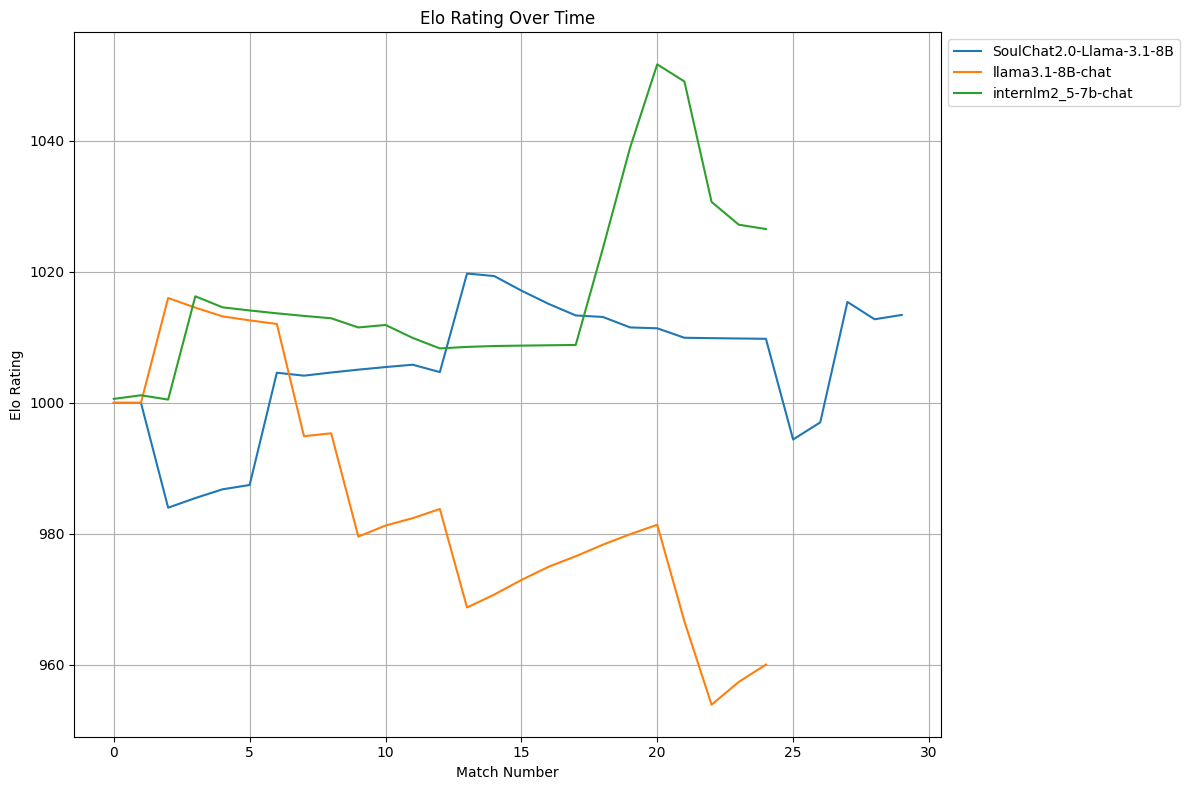

In [25]:
import matplotlib.pyplot as plt

def calculate_elo_rating_with_history(data, initial_rating=1000, k_factor=32):
    # 初始化Elo评分
    elo_ratings = {}
    elo_history = {}  # 用于记录每个模型的Elo评分历史
    
    # 遍历数据，初始化每个模型的Elo评分
    for match in data:
        model1, model2, _, _ = match
        if model1 not in elo_ratings:
            elo_ratings[model1] = initial_rating
            elo_history[model1] = []
        if model2 not in elo_ratings:
            elo_ratings[model2] = initial_rating
            elo_history[model2] = []
    
    # 按照比赛顺序（第四位）排序
    sorted_data = sorted(data, key=lambda x: x[3])
    
    # 遍历排序后的数据，更新Elo评分并记录历史
    for match in sorted_data:
        model1, model2, result, _ = match
        rating1 = elo_ratings[model1]
        rating2 = elo_ratings[model2]
        
        # 计算期望胜率
        expected1 = 1 / (1 + 10 ** ((rating2 - rating1) / 400))
        expected2 = 1 / (1 + 10 ** ((rating1 - rating2) / 400))
        
        # 更新Elo评分
        if result == 1:
            elo_ratings[model1] = rating1 + k_factor * (1 - expected1)
            elo_ratings[model2] = rating2 + k_factor * (0 - expected2)
        elif result == 0:
            elo_ratings[model1] = rating1 + k_factor * (0 - expected1)
            elo_ratings[model2] = rating2 + k_factor * (1 - expected2)
        elif result == 0.5:
            elo_ratings[model1] = rating1 + k_factor * (0.5 - expected1)
            elo_ratings[model2] = rating2 + k_factor * (0.5 - expected2)
        
        # 记录当前Elo评分
        elo_history[model1].append(elo_ratings[model1])
        elo_history[model2].append(elo_ratings[model2])
    
    return elo_history

# 示例数据
data = [
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 0],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 1],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 1, 2],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 3],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 4],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 1, 8],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 9],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 16],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 1, 18],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 21],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 22],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 24],
    ['llama3.1-8B-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 26],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 28],
    ['SoulChat2.0-Llama-3.1-8B', 'llama3.1-8B-chat', 0.5, 38],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 0.5, 5],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 0.5, 6],
    ['llama3.1-8B-chat', 'internlm2_5-7b-chat', 0, 10],
    ['llama3.1-8B-chat', 'internlm2_5-7b-chat', 0.5, 11],
    ['llama3.1-8B-chat', 'internlm2_5-7b-chat', 0.5, 17],
    ['llama3.1-8B-chat', 'internlm2_5-7b-chat', 0.5, 20],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 0.5, 23],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 1, 32],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 1, 34],
    ['internlm2_5-7b-chat', 'llama3.1-8B-chat', 0.5, 37],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 7],
    ['SoulChat2.0-Llama-3.1-8B', 'internlm2_5-7b-chat', 0.5, 12],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 13],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 14],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 15],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 19],
    ['SoulChat2.0-Llama-3.1-8B', 'internlm2_5-7b-chat', 0.5, 25],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 27],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 29],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 30],
    ['SoulChat2.0-Llama-3.1-8B', 'internlm2_5-7b-chat', 0.5, 31],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 1, 33],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0.5, 35],
    ['internlm2_5-7b-chat', 'SoulChat2.0-Llama-3.1-8B', 0, 36],
    ['SoulChat2.0-Llama-3.1-8B', 'internlm2_5-7b-chat', 0.5, 39]
]

# 计算Elo评分历史
elo_history = calculate_elo_rating_with_history(data)

# 绘制得分曲线
plt.figure(figsize=(12, 8))
for model, history in elo_history.items():
    plt.plot(history, label=model)

plt.xlabel('Match Number')
plt.ylabel('Elo Rating')
plt.title('Elo Rating Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 将图例放在图外
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
contest_list

[{'model_a': 'SoulChat2.0-Llama-3.1-8B',
  'model_b': 'llama3.1-8B-chat',
  'dialogue_a': ['<求助者>我是一个19岁的女生，最近半年，我感觉自己的性格变得很奇怪，不知道怎么了？',
   '<心理医生>首先，感谢你信任我并分享你的感受。你提到你的性格发生了变化，这种变化是怎样的呢？可以具体描述一下吗？',
   '<求助者>我感觉我的性格变得很敏感，总是会因为一些小事情而情绪波动很大。有时候我会因为一些小事而感到非常沮丧，但是又不知道为什么。',
   '<心理医生>情绪波动和对小事的敏感反应确实会让人感到困扰。你能回忆一下，这种情绪变化是从什么时候开始的吗？',
   '<求助者>这种情绪变化大概是从半年前开始的，我当时正在经历一些生活上的压力，可能是因为这些压力导致了我情绪的波动。',
   '<心理医生>生活压力确实可能影响我们的情绪。你提到了压力，能分享一下是哪些压力让你感到困扰吗？',
   '<求助者>最近我一直在准备高考，压力很大，而且我还有一些家庭问题，这些都让我感到非常焦虑和困扰。',
   '<心理医生>你正在面对高考和家庭问题，这些都是非常有挑战性的情况。面对这些压力时，你通常是如何应对的呢？',
   '<求助者>我通常会尽量保持冷静，努力应对这些压力。但是最近我发现我很难保持冷静，情绪很容易被外界影响。',
   '<心理医生>你努力保持冷静，这是非常积极的应对方式。现在你发现自己更容易受到外界影响，这可能是压力导致的。你提到你变得很敏感，能否举个例子说明呢？',
   '<求助者>比如，有时候我会因为别人的一句话就感到非常沮丧，甚至会哭出来。我之前从来没有这样过，这让我觉得很困惑。',
   '<心理医生>听起来，你的情绪反应变得更加强烈了。这种改变让你感到困惑和不自在。在你情绪波动的时候，你通常是如何安慰自己的呢？',
   '<求助者>我通常会告诉自己这只是暂时的，我会努力调整自己的情绪。但是有时候我觉得这些安慰并不能真正帮助我，我需要更深入的解决方法。',
   '<心理医生>你已经在努力寻找解决方法，这很好。我们一起来探讨一下，你认为是什么可能导致了你情绪变化的这种模式？',
   '<求助者>可能是我面对压力时没有足够的应对策略，导致情绪